# CSC311 Machine Learning Project 2019 - Group 14

    
### This notebook takes the three optimized techniques 

    Artificial Neural Network
    Logistic Regression
    Support Vector Machine

### And

    uses the test set to gauge how well each technique has done
    compares the techniques with eachother

## Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Reading Files

Read in the test data files which we created in dividedata. We will run the test data against the models we trained in `Phase 1B`

In [2]:
testing_data = pd.read_csv("dividing data/test_data.csv")

# Removing values
In the cell below we use the pop function to remove the columns such as `Unnamed` and `User` from the X input in our data. We remove these columns because they are not important to the testing of our models.

In [3]:
testing_data.pop('Unnamed: 0')
testing_data.pop('User')
print("")

In [4]:
testing_data.head(3)

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,Class
0,0.588121,-1.981951,-1.829615,0.629922,-2.764928,-1.392211,0.294858,-3.486081,-0.936200,-0.446803,-1.405766,-1.705179,-1.066397,-0.957445,-1.332448,1
1,0.522377,-2.635789,-1.397539,0.673448,-2.112314,-1.866619,0.299410,-3.497359,-0.920243,-0.468626,-1.434063,-1.753033,-1.069979,-0.974013,-1.347966,1
2,0.725188,-0.853043,-1.304965,0.804775,-1.702862,-1.355568,0.518867,-2.564007,-1.468196,-1.687714,-1.789718,-1.143147,-0.341492,-0.404725,-0.890098,1


# Declaring variables
Below we take the data from `training_data` and `crossval_data` and split it up into corresponding variables. With the training data, we take all the columns except the last column `Class` and store it into the variable `X_test` and only the last column into the variable `y_test`.

In [5]:
X_test = testing_data.drop('Class', axis=1)
y_test = testing_data['Class']

## Libraries

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Fecthing the Artifical Neural Network model

Using the pickle library we were able to save our Neural Network model to a file `nn.sav`.We will be using the code below to import that Neural Network model to our testing file to run that model against the testing data, `group14_test.csv`. In the first line of code we fetch the the file in which the model is saved and then open the file and saved the model into a variable `nn_model` 

In [7]:
%store -r clfNN

# Fecthing the Logistic Regression model
Using the pickle library we were able to save our Logistic Regression model to a file `log.sav`. We will be using the code below to import that Logistic Regression model to our testing file to run that model against the testing data, `group14_test.csv`In the first line of code we fetch the the file in which the model is saved and then open the file and saved the model into a variable `logReg_model` . The logistic Regression model is `LogisticRegression(C= 1.2, solver = 'sag', random_state= 1)`. 

In [10]:
%store -r logisticClassifier

# Fecthing the Support Vector Machines model
Using the pickle library we were able to save our Support Vector Machines model to a file `svm.sav`.We will be using the code below to import that Support Vector Machines model to our testing file to run that model against the testing data, `group14_test.csv`In the first line of code we fetch the the file in which the model is saved and then open the file and saved the model into a variable `svm_model`. The Support Vector Machine model is `svclassifier = SVC(kernel='rbf', C = 0.5, gamma = 0.03125)`

In [11]:
%store -r svClassifier

# Overall Accuracy

Next is the classification of `accuracy`. The following is the calculation or the evaluation of the overall number of  testing data samples that are correctly classified as a percentage of the total number of testing samples for `Artificial Neural Network`, `Logistic Regression` and `Support Vector Machines`. To obtain the accuracy we make use of the method `.score` providing a default evaluation criterion for the problem they are designed to solve. The parameteres for the `score` method is the declared X input values variable `X_test` and the y vector for the multi classes `y_test`. We create a variable that initializes the score method and its parameters and then print out that variable to obtain the accuracy we are in need of. 

## Artificial Neural Network

In [8]:
test_nn = clfNN.score(X_test, y_test)*100

print("Artifical Neural Network model Accuracy:",test_nn,"%")

Artifical Neural Network model Accuracy: 66.76526117054752 %


## Logistic Regression

In [14]:
test_log = logisticClassifier.score(X_test, y_test)*100
print("Logistic Regression model Accuracy:",test_log,"%")

Logistic Regression model Accuracy: 55.5254877281309 %


## Support Vector Machines

In [15]:
test_svm = svClassifier.score(X_test, y_test)*100
print("SVM model Accuracy:",test_svm,"%")

SVM model Accuracy: 67.77847702957835 %


# Confusion Matrix

Next we will create a confusion matrix that will determine which classes were confused with which other classes.  This will be done by creating a variable for prediction such as `y_nn` for  Neural Network, `y_pred` for Logistic Regression and `y_svm` for Support Vector Machines. Using the method `.confusion_matrix` with the parameters `y_true` which is the correct targeted values (the varaible `y_test` in this case is the `y vector`). The second parameter is the `y_pred` , the estimated targets as returned by a classifier. In the case of our method it will be  either `y_nn` , `y_pred` or `y_svm`. Then to normalize/scale our confusion matrix we will use the formula `variable = variable.astype('float') / variable.sum(axis=1)[:, np.newaxis]`, `variable` is the is a default name were the `confusion_matrix(y_true, y_pred)` is stored.Finally we print out the confusion matrix.

## Artificial Neural Network

Confusion Matrics:



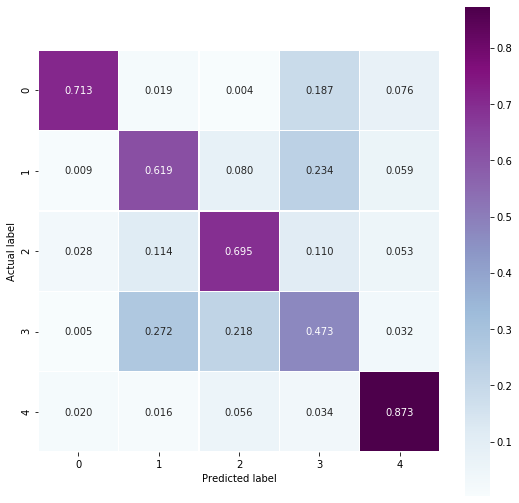

In [9]:
y_nn = clfNN.predict(X_test)

nn_matrix = metrics.confusion_matrix(y_test, y_nn)
nn_matrix = nn_matrix.astype('float') / nn_matrix.sum(axis=1)[:, np.newaxis]

#print(nn_matrix)

print("Confusion Matrics:\n")
plt.figure(figsize=(9,9))
sns.heatmap(nn_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Logistic Regression

Confusion Matrics:



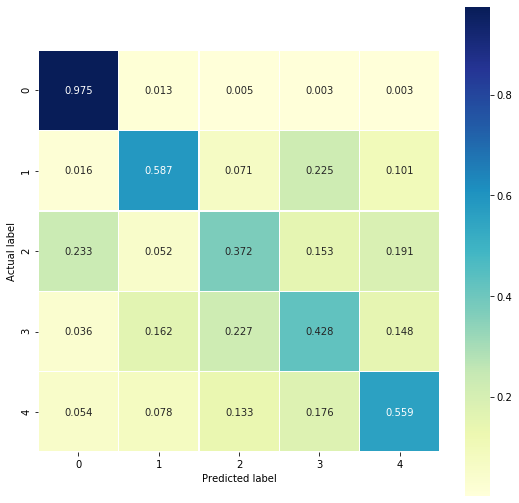

In [14]:
y_pred = logReg.predict(X_test)

log_matrix = metrics.confusion_matrix(y_test, y_pred)
log_matrix = log_matrix.astype('float') / log_matrix.sum(axis=1)[:, np.newaxis]

print("Confusion Matrics:\n")
plt.figure(figsize=(9,9))
sns.heatmap(log_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


## Support Vector Machines

Confusion Matrics:



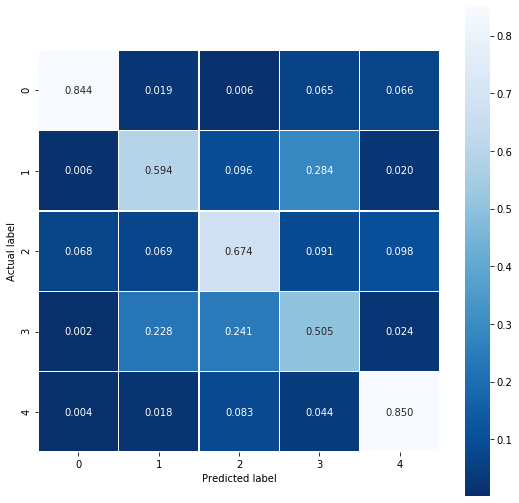

In [15]:
y_svm = svclassifier.predict(X_test)

svm_matrix = metrics.confusion_matrix(y_test, y_svm)
svm_matrix = svm_matrix.astype('float') / svm_matrix.sum(axis=1)[:, np.newaxis]

#print(svm_matrix)

print("Confusion Matrics:\n")
plt.figure(figsize=(9,9))
sns.heatmap(svm_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


# Testing Metrics

Next we will determine the `precision`, `recall` and `F1-score` of the model and analyse what they mean respect to the accuracy. To obtain the testing metric we will make use of the method `.classification_report` , with the parameters `y_true` which are the correct target values(`y_true` in this case is `y_test` which is our test data samples y vector).
The second parameter is the estimated targets returned by a classifier(in other word a variable for making predictions), in this case it will be `y_nn` for  Neural Network, `y_pred` for Logistic Regression and `y_svm` for Support Vector Machines.

The `precision` is the ratio `tp / (tp + fp)` where `tp` is the number of `true positives` and `fp` the number of `false positives`. The `precision` is intuitively the ability of the classifier not to label as positive a sample that is negative.

The `recall` is the `ratio tp / (tp + fn)` where `tp` is the number of `true positives` and `fn` the number of `false negatives`. The `recall` is intuitively the ability of the classifier to find all the positive samples.

The `F-beta` score can be interpreted as a `weighted harmonic mean` of the `precision` and `recall`, where an `F-beta score` reaches its best value at `1` and worst score at `0`.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The `support` is the number of occurrences of each class in `y_true`(correct target values).

The reported averages include `macro average` (averaging the unweighted mean per label), `weighted average` (averaging the support-weighted mean per label), `sample average` (only for multilabel classification) and `micro average` (averaging the total true positives, false negatives and false positives) it is only shown for multi-label or multi-class with a subset of classes because it is accuracy otherwise

## Artificial Neural Network

In [10]:
print(classification_report(y_test, y_nn))  

              precision    recall  f1-score   support

           1       0.89      0.71      0.79      2317
           2       0.63      0.62      0.62      3773
           3       0.70      0.70      0.70      3862
           4       0.45      0.47      0.46      3124
           5       0.78      0.87      0.82      2814

    accuracy                           0.67     15890
   macro avg       0.69      0.67      0.68     15890
weighted avg       0.67      0.67      0.67     15890



## Logistic Regression

In [12]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           1       0.65      0.98      0.78      2317
           2       0.70      0.59      0.64      3773
           3       0.51      0.37      0.43      3862
           4       0.41      0.43      0.42      3124
           5       0.50      0.56      0.53      2814

    accuracy                           0.56     15890
   macro avg       0.55      0.58      0.56     15890
weighted avg       0.55      0.56      0.55     15890



## Support Vector Machines

In [25]:
print(classification_report(y_test, y_svm))  

              precision    recall  f1-score   support

           1       0.87      0.84      0.85      2317
           2       0.68      0.59      0.63      3773
           3       0.66      0.67      0.66      3862
           4       0.48      0.51      0.49      3124
           5       0.78      0.85      0.81      2814

    accuracy                           0.68     15890
   macro avg       0.69      0.69      0.69     15890
weighted avg       0.68      0.68      0.68     15890



# Per-Class Accuracy

Next we have a multi-class problem.Now for each class we are classifying, we need to determine the number of samples of that class that were correctly recongnized as a percentage of the total number of testing data samples.Since we are working with 5 different classes we need to obtain the accuracy of each class which can easily be obtain from the confusion matrix. We just need to obtain the diagonal values of that specific confusion matrix. We just use the method `.diagonal`. We late created a for loop to print out the accuracy below one another

## Artificial Neural Network

In [11]:
print("Per Class accuracy for each class using Neural Network\n\nDigit\t Per class accuracy:\n")

perClassAcc_nn= nn_matrix.diagonal()

c = 1
for i in perClassAcc_nn:
    print(c," \t ",round(i,5))
    c+=1

Per Class accuracy for each class using Neural Network

Digit	 Per class accuracy:

1  	  0.71342
2  	  0.6194
3  	  0.69524
4  	  0.47279
5  	  0.87313


## Logistic Regression

In [12]:
print("Per Class accuracy for each Digit using Logistic Regression\n\nDigit\t Per class accuracy:\n")

perClassAcc_log= log_matrix.diagonal()

c = 1
for i in perClassAcc_log:
    print(c," \t ",round(i,5))
    c+=1

Per Class accuracy for each Digit using Logistic Regression

Digit	 Per class accuracy:

1  	  0.9741
2  	  0.6149
3  	  0.41869
4  	  0.40749
5  	  0.52345


## Support Vector Machines

In [28]:
print("Per Class accuracy for each class using Support Vector Machines\n\nDigit\t Per class accuracy:\n")

perClassAcc_svm= svm_matrix.diagonal()

c = 1
for i in perClassAcc_svm:
    print(c," \t ",round(i,5))
    c+=1

Per Class accuracy for each class using Support Vector Machines

Digit	 Per class accuracy:

1  	  0.8442
2  	  0.59369
3  	  0.67374
4  	  0.50544
5  	  0.85039


# Additional Relevant Analyses

For the following section we will be making use of graphs to determine how well our model is generalized and attempt to determine where the source of errors may have occured/been. For this we use graphs, such and `bar graphs` or `pie graphs`.Using the confusion matrix and graphs can help determine tell if the data samples `look` similar.

## Artificial Neural Network

              precision    recall  f1-score   support

           1       0.89      0.71      0.79      2317
           2       0.63      0.62      0.62      3773
           3       0.70      0.70      0.70      3862
           4       0.45      0.47      0.46      3124
           5       0.78      0.87      0.82      2814

    accuracy                           0.67     15890
   macro avg       0.69      0.67      0.68     15890
weighted avg       0.67      0.67      0.67     15890



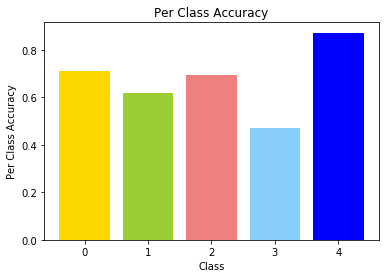

In [12]:
print(metrics.classification_report(y_test, y_nn))
objects = ('0','1', '2', '3', '4')
val = np.arange(len(objects))

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']

plt.bar(val, perClassAcc_nn, color = colors)
plt.xticks(val, objects)
plt.xlabel('Class')
plt.ylabel('Per Class Accuracy')
plt.title('Per Class Accuracy')
 
plt.show()

## Logistic Regression

              precision    recall  f1-score   support

           1       0.64      0.97      0.77      2317
           2       0.66      0.61      0.64      3773
           3       0.52      0.42      0.46      3862
           4       0.44      0.41      0.42      3124
           5       0.52      0.52      0.52      2814

    accuracy                           0.56     15890
   macro avg       0.56      0.59      0.56     15890
weighted avg       0.56      0.56      0.55     15890



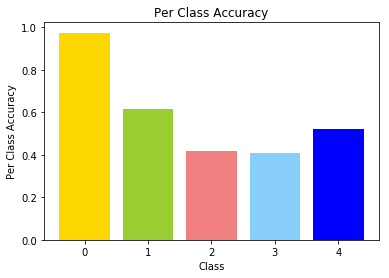

In [30]:
print(metrics.classification_report(y_test, y_pred))
objects = ('0','1', '2', '3', '4')
val = np.arange(len(objects))

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']

plt.bar(val, perClassAcc_log, color = colors)
plt.xticks(val, objects)
plt.xlabel('Class')
plt.ylabel('Per Class Accuracy')
plt.title('Per Class Accuracy')
 
plt.show()

## Support Vector Machines

              precision    recall  f1-score   support

           1       0.87      0.84      0.85      2317
           2       0.68      0.59      0.63      3773
           3       0.66      0.67      0.66      3862
           4       0.48      0.51      0.49      3124
           5       0.78      0.85      0.81      2814

    accuracy                           0.68     15890
   macro avg       0.69      0.69      0.69     15890
weighted avg       0.68      0.68      0.68     15890



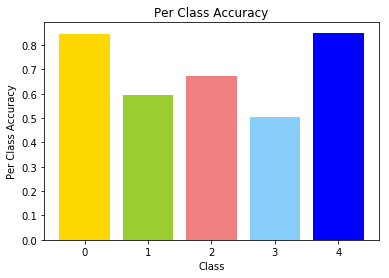

In [31]:
print(metrics.classification_report(y_test, y_svm))
objects = ('0','1', '2', '3', '4')
val = np.arange(len(objects))

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']

plt.bar(val, perClassAcc_svm, color = colors)
plt.xticks(val, objects)
plt.xlabel('Class')
plt.ylabel('Per Class Accuracy')
plt.title('Per Class Accuracy')
 
plt.show()

# Statement

From what we can tell from the bar graphs in terms of accuracy is that the Logistic Regression performed poorly in some of its classes and that its not the desired techinque that we would want whereas Neural Network and Support Vector Machins is what we are looking for because they did well in terms of accuracy per class and not they look similar in terms of accuracy across the board.